In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.oauth2 import service_account
from google.cloud import bigquery

from datetime import timedelta

import ipdb

key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"

credentials = service_account.Credentials.from_service_account_file(key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"])


In [2]:
def extract():
    # Construct a BigQuery client object.
    key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"
    

    credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],)
    
    client = bigquery.Client(project="marbotic", credentials=credentials)

    query = """
        SELECT *
        FROM `marbotic.marbotic_dataset.sessions_metrics`
    """

    query_job = client.query(query)  # Make an API request.
    results=query_job.result().to_dataframe() # Waits for job to complete.

    return pd.DataFrame(results)


In [101]:
def extract_users():
    # Construct a BigQuery client object.
    key_path = "/home/clementine/code/Clementinelalande/gcp/marbotic-4221eb142ed6.json"
    

    credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],)
    
    client = bigquery.Client(project="marbotic", credentials=credentials)

    query = """
        SELECT *
        FROM `marbotic.marbotic_dataset.user_properties`
    """

    query_job = client.query(query)  # Make an API request.
    results=query_job.result().to_dataframe() # Waits for job to complete.

    return pd.DataFrame(results)



In [14]:
sessions = extract()
sessions

,session_id,city,language,os_version,region,country,device_model,start_version,session_end,id,...,event_type_Profile_Delete,event_type_Profile_Reset_Settings_and_Progression,event_type_Profile_Update,event_type_Scaffolding_Reset,event_type_Scaffolding_Scaffolding,event_type_Scene_Enter,event_type_Scene_Leave,event_type_Toast_Appear,event_type_Toast_Disappear,session_start
0,1.647421e+12,Certines,French,15.3.1,Ain,France,"iPad11,6",1.0.1,2022-03-16 08:58:14.214000+00:00,6,...,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,2022-03-16 08:56:40.722000+00:00
1,1.647421e+12,Certines,French,15.1,Ain,France,"iPad11,6",1.0.1,2022-03-16 08:57:59.845000+00:00,5,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,2022-03-16 08:57:48.381000+00:00
2,1.647421e+12,Certines,French,15.1,Ain,France,"iPad11,6",1.0.1,2022-03-16 08:58:45.380000+00:00,5,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,2022-03-16 08:58:28.269000+00:00
3,1.648134e+12,Certines,French,15.3.1,Ain,France,"iPad11,6",1.0.1,2022-03-24 15:06:35.838000+00:00,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2022-03-24 15:06:21.426000+00:00
4,1.646512e+12,Izernore,French,15.2,Ain,France,iPad 6,1.0.3,2022-03-05 20:23:36.482000+00:00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-03-05 20:23:34.583000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18811,1.646491e+12,Notting Hill Gate,English,15.1,Royal Kensington and Chelsea,United Kingdom,iPad 6,1.0.7,2022-03-05 14:40:14.517000+00:00,5,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,2022-03-05 14:39:48.894000+00:00
18812,1.652027e+12,Hamburg,English,14.6,Free and Hanseatic City of Hamburg,Germany,iPad Pro,4.1.3,2022-05-08 16:39:55.181000+00:00,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-05-08 16:32:21.326000+00:00
18813,1.652029e+12,Hamburg,English,14.6,Free and Hanseatic City of Hamburg,Germany,iPad Pro,4.1.3,2022-05-08 17:01:24.501000+00:00,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-05-08 16:58:54.378000+00:00
18814,1.652377e+12,Hamburg,English,14.6,Free and Hanseatic City of Hamburg,Germany,iPad Pro,4.1.3,2022-05-12 18:05:34.559000+00:00,19,...,0.0,0.0,0.0,0.0,0.0,10.0,4.0,0.0,0.0,2022-05-12 17:38:47.898000+00:00


In [102]:
users_properties = extract_users()

users_properties

,Newsletter,Type,Country,Language,ProfileType2,ReceiveNewsletter,LoggedIn,Products_Sesame_Street_Numbers,Products_Smart_Shapes,Products_Smart_Numbers,...,Games_Marbotic_Letters,Games_More_Or_Less,Games_Marbotic,Games_Vocabubble,event_id,client_event_time,user_creation_time,user_id,id,Products_Sensory_kit
0,False,Teacher,LU,English,None,None,None,0,0,0,...,0,0,0,0,1,2022-03-03 10:17:33.279000+00:00,2022-03-03 10:15:15.799000+00:00,0,38695,NaN
1,False,Teacher,LU,English,None,None,None,0,0,0,...,0,0,0,0,2,2022-03-03 10:17:33.279000+00:00,2022-03-03 10:15:15.799000+00:00,0,38696,NaN
2,False,Parent,AT,English,None,None,None,0,0,0,...,0,0,0,0,9,2022-03-04 18:10:45.671000+00:00,2021-05-12 14:48:12.149000+00:00,0,70424,NaN
3,False,Parent,AT,English,None,None,None,0,0,0,...,0,0,0,0,1,2022-03-04 18:09:42.747000+00:00,2021-05-12 14:48:12.149000+00:00,0,70686,NaN
4,False,Parent,AT,English,None,None,None,0,0,0,...,0,0,0,0,2,2022-03-04 18:09:42.748000+00:00,2021-05-12 14:48:12.149000+00:00,0,70687,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320224,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,122,2022-05-13 00:03:46.899000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313882,0.0
1320225,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,123,2022-05-13 00:03:58.233000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313883,0.0
1320226,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,102,2022-05-13 00:00:35.906000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313884,0.0
1320227,True,Parent,CA,English,None,None,None,0,1,0,...,1,1,1,1,127,2022-05-13 00:05:47.672000+00:00,2021-10-12 00:49:57.340000+00:00,63728,1313885,0.0


In [ ]:
users_properties(user_properties["user_creation_time"] > "2022-03-01 00:00:00")

In [57]:
sessions.duplicated().sum()


0

In [58]:
sessions.columns

Index(['session_id', 'city', 'language', 'os_version', 'region', 'country',
       'device_model', 'start_version', 'session_end', 'id', 'user_id',
       'event_type_Account_Sign_In', 'event_type_Account_Sign_Out',
       'event_type_Account_Sign_Up', 'event_type_Account_Update_Request',
       'event_type_Account_Update_Success', 'event_type_Action_Click',
       'event_type_Action_ConversionClickRedeem',
       'event_type_Action_ConversionClickSubscribe',
       'event_type_Activation_Game', 'event_type_Activation_New_Activation',
       'event_type_Activation_Piece', 'event_type_Activation_Product',
       'event_type_Activity_Good_Answer', 'event_type_Activity_Start',
       'event_type_Activity_Stop', 'event_type_Activity_Wrong_Answer',
       'event_type_Error_Error', 'event_type_Game_Pause',
       'event_type_Game_Start', 'event_type_Game_Stop',
       'event_type_OB_ClickStore', 'event_type_OB_ClickTrial',
       'event_type_OB_CommPreview', 'event_type_OB_DiscoverTrial',
  

In [59]:
sessions.user_id.nunique()


2614

In [84]:
sessions["session_duration"] = sessions["session_end"]-sessions["session_start"]

sessions["session_duration"].apply(timedelta.total_seconds)/3600

0        0.025970
1        0.003184
2        0.004753
3        0.004003
4        0.000527
           ...   
18811    0.007118
18812    0.126071
18813    0.041701
18814    0.446295
18815    1.757569
Name: session_duration, Length: 18816, dtype: float64

(0.0, 5000000000000.0)

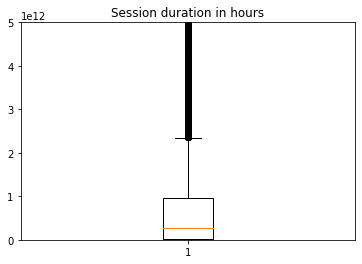

In [109]:
plt.boxplot(sessions["session_duration"]);
plt.title("Session duration in hours")
plt.ylim(0,5000000000000)


In [106]:
group_by_id = pd.DataFrame(sessions.groupby('user_id').nunique()["session_id"])


,session_id
user_id,
211.0,8
274.0,7
453.0,3
564.0,1
609.0,1
...,...
73184.0,1
73185.0,1
73188.0,1


Text(0.5, 1.0, 'Nb of users grouped by number of sessions observed')

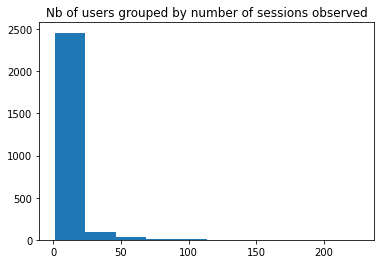

In [100]:
plt.hist(group_by_id["session_id"]);

plt.title("Nb of users grouped by number of unique session_id observed")
plt.xtitle()
# plt.ylim(0,4)





In [107]:
list_event = [col for col in list(sessions.columns) if col[:11] == "event_type_"]

list_event

# for col in list_event:
#     col_series = df_final.groupby("user_id").sum()[col]
#     user_base = pd.merge(user_base.copy(), col_series, on="user_id", how="left")




['event_type_Account_Sign_In',
 'event_type_Account_Sign_Out',
 'event_type_Account_Sign_Up',
 'event_type_Account_Update_Request',
 'event_type_Account_Update_Success',
 'event_type_Action_Click',
 'event_type_Action_ConversionClickRedeem',
 'event_type_Action_ConversionClickSubscribe',
 'event_type_Activation_Game',
 'event_type_Activation_New_Activation',
 'event_type_Activation_Piece',
 'event_type_Activation_Product',
 'event_type_Activity_Good_Answer',
 'event_type_Activity_Start',
 'event_type_Activity_Stop',
 'event_type_Activity_Wrong_Answer',
 'event_type_Error_Error',
 'event_type_Game_Pause',
 'event_type_Game_Start',
 'event_type_Game_Stop',
 'event_type_OB_ClickStore',
 'event_type_OB_ClickTrial',
 'event_type_OB_CommPreview',
 'event_type_OB_DiscoverTrial',
 'event_type_OB_DoYouHaveKit',
 'event_type_OB_Email',
 'event_type_OB_HasKeyNo',
 'event_type_OB_HasKitNo',
 'event_type_OB_HasKitYes',
 'event_type_OB_KeyFail',
 'event_type_OB_KeyRedeem',
 'event_type_OB_KeySuccess

In [ ]:
sessions_and_users = pd.merge(group_by_id,users_properties,on="user_id", how="left")

In [15]:
dict_event_simple = {'[Profile] Create' : "setup" ,                     
         '[Profile] Update' : "setup",                     
         '[Account] Sign In' : "setup",                    
         '[OB] ProfileName' : "setup",                     
         '[OB] ProfileBirthdate' : "setup",                    
         '[Activation] Game' : "game",                    
         '[OB] KeyRedeem' : "setup",                     
         '[OB] KeyFail' : "setup",                     
         '[OB] RenewalSelection' : "setup",                    
         '[Account] Sign Up' : "setup",                     
         '[OB] ProductSelection' : "setup",                    
         '[OB] ProductSK' : "setup",                    
         '[OB] ProductHelp' : "setup",                     
         '[OB] ProductActivation' : "setup",                     
         '[Game] Stop' : "game",
         '[OB] RenewalSuccess' : "setup",                     
         '[OB] ProductSeeMore' : "setup",                     
         '[OB] ProductOther' : "setup",                    
         '[Scaffolding] Reset' : "game",                    
         '[Account] Sign Out' : "setup",                     
         '[OB] CommPreview' : "setup",                    
         '[OB] DoYouHaveKit' : "setup",                    
         '[OB] HasKitYes' : "setup",                     
         '[OB] Email' : "setup",                    
         '[OB] VerifCode' : "setup",                     
         '[Activation] New Activation' : "setup",
         '[Activation] Product' : "setup",                     
         '[Activation] Piece' : "setup",                     
         '[OB] Success' : "setup",                    
         '[OB] RenewalFail' : "setup",                     
         '[OB] ClickTrial' : "setup",                     
         '[Popup] Open' : "setup",                    
         '[Popup] Close' : "setup",                   
         '[OB] HasKitNo' : "setup",                    
         '[OB] DiscoverTrial' : "setup",                    
         '[Account] Update Request' : "setup",                     
         '[Account] Update Success' : "setup",                    
         '[Profile] Delete' : "setup",                     
         '[OB] TrialStart' : "setup",                     
         '[OB] ClickStore' : "setup",                    
         '[OB] HasKeyNo' : "setup",                     
         '[OB] Type' : "setup",                     
         '[OB] KeySuccess' : "setup",                     
         '[Game] Pause' : "game",                    
         '[Game] Start' : "game",                    
         '[Error] Error' : "game",                     
         '[Scene] Enter' : "game",                     
         '[Scene] Leave' : "game",                    
         '[Action] Click' : "game",
         '[Activity] Stop' : "game", 
         '[Activity] Start' : "game",
         '[Activity] Good Answer' : "game", 
         '[Activity] Wrong Answer' : "game",
         '[Scaffolding] Scaffolding' : "game",                    
         '[Profile] Reset Settings and Progression' : "setup"}    


In [17]:
df["event_simple"]=df["event_type"].map(dict_event_simple)


<AxesSubplot:xlabel='event_simple', ylabel='Count'>

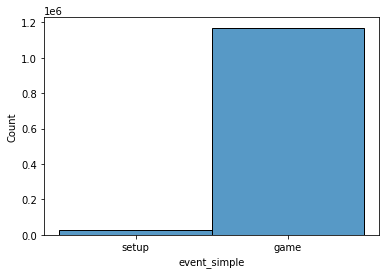

In [18]:
sns.histplot(data=sessions, x="event_simple")


<AxesSubplot:xlabel='event_type', ylabel='Count'>

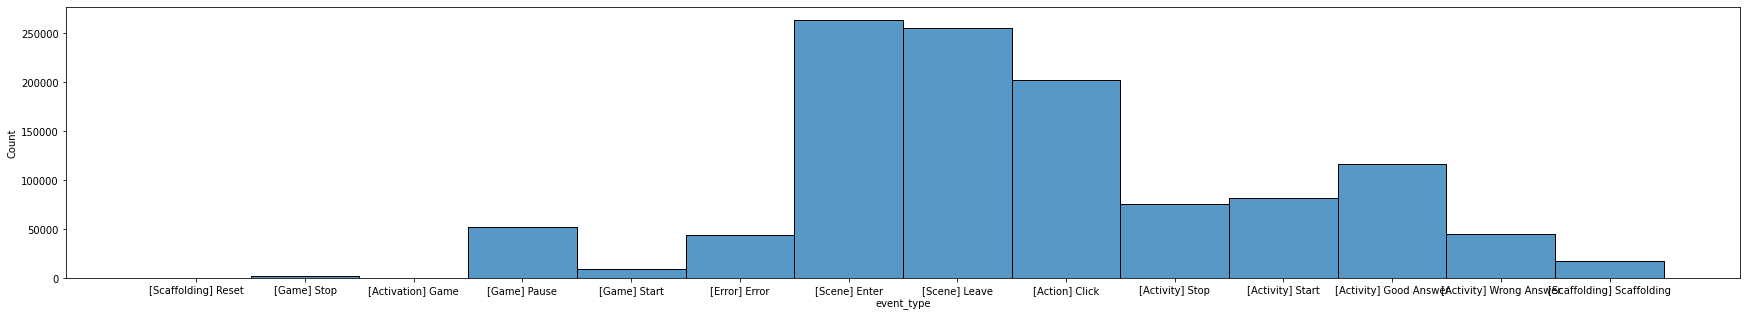

In [19]:
plt.figure(figsize=(30,5))

sns.histplot(data=df[df['event_simple']=='game'], x="event_type")


In [20]:
df[df['event_simple']=='game'].nunique()


city                       1749
client_event_time       1161188
country                      74
device_model                 33
event_id                  35272
event_type                   14
is_attribution_event          1
language                     16
os_version                   72
region                      395
session_id                18814
start_version                54
user_creation_time         2624
user_id                    2624
id                      1169806
event_simple                  1
dtype: int64

In [21]:
#calculate game intensity metrics by player
#step 1 : one hot encode game feature
from sklearn.preprocessing import OneHotEncoder

# Instantiate encoder
ohe = OneHotEncoder(sparse = False) 

# Fit encoder all 55 features, not great (i want to use it only for the gaming events, but hey, you got what you got
ohe.fit(df[['event_type']]) 

# Encode + retrieve columns names
df_encoded = ohe.transform(df[['event_type']]) 
df_encoded = pd.DataFrame(df_encoded)

df_encoded.columns = ohe.get_feature_names_out()


In [22]:
df_final = pd.concat([df,df_encoded],axis=1)
df_final


,city,client_event_time,country,device_model,event_id,event_type,is_attribution_event,language,os_version,region,...,event_type_[Profile] Create,event_type_[Profile] Delete,event_type_[Profile] Reset Settings and Progression,event_type_[Profile] Update,event_type_[Scaffolding] Reset,event_type_[Scaffolding] Scaffolding,event_type_[Scene] Enter,event_type_[Scene] Leave,event_type_[Toast] Appear,event_type_[Toast] Disappear
1,London,2022-03-09 18:28:18.765000+00:00,United Kingdom,iPad 6,18.0,[Activation] New Activation,False,English,14.1,England,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,London,2022-03-09 18:28:18.766000+00:00,United Kingdom,iPad 6,19.0,[Activation] Product,False,English,14.1,England,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,London,2022-03-09 18:28:18.767000+00:00,United Kingdom,iPad 6,20.0,[Activation] Piece,False,English,14.1,England,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,London,2022-03-09 18:28:19.337000+00:00,United Kingdom,iPad 6,21.0,[OB] Success,False,English,14.1,England,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,London,2022-03-09 18:33:24.440000+00:00,United Kingdom,iPad 6,39.0,[OB] ProductSelection,False,English,14.1,England,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194015,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1194016,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1194017,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1194018,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# list_event = []
# for eve in list(df["event_type"].unique()):
#     list_event.append(f'df["{eve}"]')                          
# list_event

# string_event = ",".join(list_event)
# string_event                      


In [23]:
for col in list(df_final.columns):
    col_new = col.replace("[","").replace("]","").replace(" ","_")
    if col_new != col: 
        df_final[col_new] = df_final[col]
        del df_final[col]
df_final

,city,client_event_time,country,device_model,event_id,event_type,is_attribution_event,language,os_version,region,...,event_type_Profile_Create,event_type_Profile_Delete,event_type_Profile_Reset_Settings_and_Progression,event_type_Profile_Update,event_type_Scaffolding_Reset,event_type_Scaffolding_Scaffolding,event_type_Scene_Enter,event_type_Scene_Leave,event_type_Toast_Appear,event_type_Toast_Disappear
1,London,2022-03-09 18:28:18.765000+00:00,United Kingdom,iPad 6,18.0,[Activation] New Activation,False,English,14.1,England,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,London,2022-03-09 18:28:18.766000+00:00,United Kingdom,iPad 6,19.0,[Activation] Product,False,English,14.1,England,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,London,2022-03-09 18:28:18.767000+00:00,United Kingdom,iPad 6,20.0,[Activation] Piece,False,English,14.1,England,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,London,2022-03-09 18:28:19.337000+00:00,United Kingdom,iPad 6,21.0,[OB] Success,False,English,14.1,England,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,London,2022-03-09 18:33:24.440000+00:00,United Kingdom,iPad 6,39.0,[OB] ProductSelection,False,English,14.1,England,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194015,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1194016,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1194017,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1194018,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_final.columns




Index(['city', 'client_event_time', 'country', 'device_model', 'event_id',
       'event_type', 'is_attribution_event', 'language', 'os_version',
       'region', 'session_id', 'start_version', 'user_creation_time',
       'user_id', 'id', 'event_simple', 'event_type_Account_Sign_In',
       'event_type_Account_Sign_Out', 'event_type_Account_Sign_Up',
       'event_type_Account_Update_Request',
       'event_type_Account_Update_Success', 'event_type_Action_Click',
       'event_type_Action_ConversionClickRedeem',
       'event_type_Action_ConversionClickSubscribe',
       'event_type_Activation_Game', 'event_type_Activation_New_Activation',
       'event_type_Activation_Piece', 'event_type_Activation_Product',
       'event_type_Activity_Good_Answer', 'event_type_Activity_Start',
       'event_type_Activity_Stop', 'event_type_Activity_Wrong_Answer',
       'event_type_Error_Error', 'event_type_Game_Pause',
       'event_type_Game_Start', 'event_type_Game_Stop',
       'event_type_OB_Cl

In [25]:
user_base = pd.DataFrame(df_final.groupby("user_id").max()["user_creation_time"])
user_base

for col in ['id','session_id']:
    col_series = df_final.groupby("user_id").nunique()[col]
    user_base = pd.merge(user_base.copy(), col_series, on="user_id", how="left")

user_base


,user_creation_time,id,session_id
user_id,,,
211.0,2022-02-27 13:34:22.901000+00:00,824,8
274.0,2020-09-18 17:14:30.805000+00:00,40,7
453.0,2021-11-01 23:55:04.177000+00:00,153,3
564.0,2021-01-01 20:29:36.330000+00:00,52,1
609.0,2020-10-27 15:15:40.936000+00:00,69,1
...,...,...,...
73184.0,2022-05-12 16:20:23.231000+00:00,81,1
73185.0,2022-05-12 16:30:57.876000+00:00,122,1
73188.0,2022-05-12 21:02:44.492000+00:00,219,1


In [26]:
list_event = [col for col in list(df_final.columns) if col[:11] == "event_type_"]

list_event

for col in list_event:
    col_series = df_final.groupby("user_id").sum()[col]
    user_base = pd.merge(user_base.copy(), col_series, on="user_id", how="left")

user_base

,user_creation_time,id,session_id,event_type_Account_Sign_In,event_type_Account_Sign_Out,event_type_Account_Sign_Up,event_type_Account_Update_Request,event_type_Account_Update_Success,event_type_Action_Click,event_type_Action_ConversionClickRedeem,...,event_type_Profile_Create,event_type_Profile_Delete,event_type_Profile_Reset_Settings_and_Progression,event_type_Profile_Update,event_type_Scaffolding_Reset,event_type_Scaffolding_Scaffolding,event_type_Scene_Enter,event_type_Scene_Leave,event_type_Toast_Appear,event_type_Toast_Disappear
user_id,,,,,,,,,,,,,,,,,,,,,
211.0,2022-02-27 13:34:22.901000+00:00,824,8,0.0,0.0,0.0,0.0,0.0,173.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,320.0,127.0,0.0,0.0
274.0,2020-09-18 17:14:30.805000+00:00,40,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,6.0,0.0,0.0
453.0,2021-11-01 23:55:04.177000+00:00,153,3,0.0,0.0,0.0,0.0,0.0,32.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0
564.0,2021-01-01 20:29:36.330000+00:00,52,1,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,15.0,0.0,0.0
609.0,2020-10-27 15:15:40.936000+00:00,69,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73184.0,2022-05-12 16:20:23.231000+00:00,81,1,0.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,21.0,0.0,0.0
73185.0,2022-05-12 16:30:57.876000+00:00,122,1,0.0,0.0,0.0,0.0,0.0,31.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,34.0,0.0,0.0
73188.0,2022-05-12 21:02:44.492000+00:00,219,1,0.0,0.0,0.0,0.0,0.0,67.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,58.0,19.0,0.0,0.0


In [28]:
# Group by customerID and select only the information for the last timestamp
grouping =df_final.loc[df_final.groupby("user_id")["client_event_time"].idxmax()]
grouping = grouping[['user_id','client_event_time','city','language','os_version','region','country','device_model','start_version']]
grouping = grouping.merge(user_base,on="user_id",how='inner')
grouping


,user_id,client_event_time,city,language,os_version,region,country,device_model,start_version,user_creation_time,...,event_type_Profile_Create,event_type_Profile_Delete,event_type_Profile_Reset_Settings_and_Progression,event_type_Profile_Update,event_type_Scaffolding_Reset,event_type_Scaffolding_Scaffolding,event_type_Scene_Enter,event_type_Scene_Leave,event_type_Toast_Appear,event_type_Toast_Disappear
0,211.0,2022-03-13 13:32:14.916000+00:00,Norwich,English,14.7.1,Norfolk,United Kingdom,iPad 5,1.0.8,2022-02-27 13:34:22.901000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,320.0,127.0,0.0,0.0
1,274.0,2022-05-01 17:44:50.615000+00:00,Columbus,English,14.7.1,Ohio,United States,"iPad11,6",1.2.1,2020-09-18 17:14:30.805000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,6.0,0.0,0.0
2,453.0,2022-03-19 21:37:36.833000+00:00,Livermore,English,12.5.5,California,United States,iPad Air,1.3.0,2021-11-01 23:55:04.177000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,35.0,0.0,0.0
3,564.0,2022-04-23 15:37:54.445000+00:00,Carson City,English,14.8,Nevada,United States,iPad Air 2,1.0.1,2021-01-01 20:29:36.330000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,30.0,15.0,0.0,0.0
4,609.0,2022-05-07 16:33:03.540000+00:00,Westminster,English,15.4.1,Maryland,United States,iPad 6,2.1.0,2020-10-27 15:15:40.936000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,73184.0,2022-05-12 16:33:26.489000+00:00,Saint-Eustache,French,15.3.1,Quebec,Canada,iPad 5,2.0.6,2022-05-12 16:20:23.231000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,21.0,0.0,0.0
2622,73185.0,2022-05-12 17:04:58.087000+00:00,Thunder Bay,English,14.7.1,Ontario,Canada,iPad Air 2,2.0.6,2022-05-12 16:30:57.876000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,34.0,0.0,0.0
2623,73188.0,2022-05-12 23:13:13.334000+00:00,Seattle,English,13.4.1,Washington,United States,iPad Air 3,2.0.6,2022-05-12 21:02:44.492000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,58.0,19.0,0.0,0.0
2624,73197.0,2022-05-13 09:25:19.784000+00:00,Deinze,Dutch,15.4,East Flanders Province,Belgium,iPad Pro,2.0.6,2022-05-13 09:21:35.633000+00:00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [33]:
#Localisation du projet name et table_id sur gcp
project="marbotic"
table_id = "marbotic_dataset.users_metrics"
client = bigquery.Client(project,credentials)

job = client.load_table_from_dataframe(grouping, table_id) 

job.result()  # Wait for the job to complete.
table = client.get_table(table_id)  # Make an API request.
print("Loaded {} rows and {} columns to {}".format(table.num_rows, len(table.schema), table_id))

      
    

Loaded 2626 rows and 71 columns to marbotic_dataset.users_metrics


In [43]:
#creating session derivative table

#add session end timestamp

session_base = pd.DataFrame(df_final.groupby("session_id").max()["client_event_time"])
session_base

col_series = df_final.groupby("session_id").nunique()['id']
session_base = pd.merge(session_base.copy(), col_series, on="session_id", how="left")

session_base



,client_event_time,id
session_id,,
1.641524e+12,2022-01-07 02:56:29.983000+00:00,2
1.641826e+12,2022-01-10 15:05:31.598000+00:00,1
1.641931e+12,2022-01-11 20:00:30.512000+00:00,97
1.641932e+12,2022-01-11 20:06:04.323000+00:00,2
1.642001e+12,2022-01-12 15:34:25.246000+00:00,5
...,...,...
1.652434e+12,2022-05-13 09:52:12.279000+00:00,26
1.652434e+12,2022-05-13 09:52:15.555000+00:00,28
1.652435e+12,2022-05-13 09:55:59.033000+00:00,24


In [44]:
#add individual OHE events counts

for col in list_event:
    col_series = df_final.groupby("session_id").sum()[col]
    session_base = pd.merge(session_base.copy(), col_series, on="session_id", how="left")

session_base



,client_event_time,id,event_type_Account_Sign_In,event_type_Account_Sign_Out,event_type_Account_Sign_Up,event_type_Account_Update_Request,event_type_Account_Update_Success,event_type_Action_Click,event_type_Action_ConversionClickRedeem,event_type_Action_ConversionClickSubscribe,...,event_type_Profile_Create,event_type_Profile_Delete,event_type_Profile_Reset_Settings_and_Progression,event_type_Profile_Update,event_type_Scaffolding_Reset,event_type_Scaffolding_Scaffolding,event_type_Scene_Enter,event_type_Scene_Leave,event_type_Toast_Appear,event_type_Toast_Disappear
session_id,,,,,,,,,,,,,,,,,,,,,
1.641524e+12,2022-01-07 02:56:29.983000+00:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1.641826e+12,2022-01-10 15:05:31.598000+00:00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1.641931e+12,2022-01-11 20:00:30.512000+00:00,97,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,40.0,15.0,0.0,0.0
1.641932e+12,2022-01-11 20:06:04.323000+00:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.642001e+12,2022-01-12 15:34:25.246000+00:00,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.652434e+12,2022-05-13 09:52:12.279000+00:00,26,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0
1.652434e+12,2022-05-13 09:52:15.555000+00:00,28,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0
1.652435e+12,2022-05-13 09:55:59.033000+00:00,24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0


In [45]:
# Group by customerID and select only the information for the last timestamp
grouping =df_final.loc[df_final.groupby("session_id")["client_event_time"].idxmax()]
grouping = grouping[['session_id','city','language','os_version','region','country','device_model','start_version']]
session_base = grouping.merge(session_base.copy(),on="session_id",how='inner')
session_base



,session_id,city,language,os_version,region,country,device_model,start_version,client_event_time,id,...,event_type_Profile_Create,event_type_Profile_Delete,event_type_Profile_Reset_Settings_and_Progression,event_type_Profile_Update,event_type_Scaffolding_Reset,event_type_Scaffolding_Scaffolding,event_type_Scene_Enter,event_type_Scene_Leave,event_type_Toast_Appear,event_type_Toast_Disappear
0,1.641524e+12,Eugene,English,15.2,Oregon,United States,iPad Pro,1.0.7,2022-01-07 02:56:29.983000+00:00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1.641826e+12,Lithonia,English,12.5.5,Georgia,United States,iPad Mini 2,1.2.0,2022-01-10 15:05:31.598000+00:00,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.641931e+12,Oakville,English,13.5.1,Ontario,Canada,iPad Air 2,1.0.1,2022-01-11 20:00:30.512000+00:00,97,...,0.0,0.0,0.0,0.0,0.0,0.0,40.0,15.0,0.0,0.0
3,1.641932e+12,Oakville,English,13.5.1,Ontario,Canada,iPad Air 2,1.0.1,2022-01-11 20:06:04.323000+00:00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.642001e+12,Parignargues,French,15.2,Gard,France,iPad 6,1.0.3,2022-01-12 15:34:25.246000+00:00,5,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18811,1.652434e+12,Montreal,French,10.3.3,Aude,France,iPad 4,1.0.1,2022-05-13 09:52:12.279000+00:00,26,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0
18812,1.652434e+12,Montreal,French,10.3.3,Aude,France,iPad 4,1.0.1,2022-05-13 09:52:15.555000+00:00,28,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0
18813,1.652435e+12,Medina,English,15.4.1,Medina Region,Saudi Arabia,"iPad12,1",2.0.6,2022-05-13 09:55:59.033000+00:00,24,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0
18814,1.652435e+12,Melbourne,Chinese,12.5.5,Victoria,Australia,iPad Air,2.0.5,2022-05-13 09:58:43.012000+00:00,39,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,0.0,0.0


In [46]:
init_session = pd.DataFrame(df_final.groupby("session_id").min()["client_event_time"])
init_session

session_base = pd.merge(session_base.copy(), init_session, on="session_id", how="left")

session_base





,session_id,city,language,os_version,region,country,device_model,start_version,client_event_time_x,id,...,event_type_Profile_Delete,event_type_Profile_Reset_Settings_and_Progression,event_type_Profile_Update,event_type_Scaffolding_Reset,event_type_Scaffolding_Scaffolding,event_type_Scene_Enter,event_type_Scene_Leave,event_type_Toast_Appear,event_type_Toast_Disappear,client_event_time_y
0,1.641524e+12,Eugene,English,15.2,Oregon,United States,iPad Pro,1.0.7,2022-01-07 02:56:29.983000+00:00,2,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2022-01-07 02:56:28.793000+00:00
1,1.641826e+12,Lithonia,English,12.5.5,Georgia,United States,iPad Mini 2,1.2.0,2022-01-10 15:05:31.598000+00:00,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2022-01-10 15:05:31.598000+00:00
2,1.641931e+12,Oakville,English,13.5.1,Ontario,Canada,iPad Air 2,1.0.1,2022-01-11 20:00:30.512000+00:00,97,...,0.0,0.0,0.0,0.0,0.0,40.0,15.0,0.0,0.0,2022-01-11 19:49:46.744000+00:00
3,1.641932e+12,Oakville,English,13.5.1,Ontario,Canada,iPad Air 2,1.0.1,2022-01-11 20:06:04.323000+00:00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-11 20:06:03.428000+00:00
4,1.642001e+12,Parignargues,French,15.2,Gard,France,iPad 6,1.0.3,2022-01-12 15:34:25.246000+00:00,5,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2022-01-12 15:34:18.911000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18811,1.652434e+12,Montreal,French,10.3.3,Aude,France,iPad 4,1.0.1,2022-05-13 09:52:12.279000+00:00,26,...,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0,2022-05-13 09:31:25.198000+00:00
18812,1.652434e+12,Montreal,French,10.3.3,Aude,France,iPad 4,1.0.1,2022-05-13 09:52:15.555000+00:00,28,...,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0,2022-05-13 09:31:39.459000+00:00
18813,1.652435e+12,Medina,English,15.4.1,Medina Region,Saudi Arabia,"iPad12,1",2.0.6,2022-05-13 09:55:59.033000+00:00,24,...,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,2022-05-13 09:51:46.132000+00:00
18814,1.652435e+12,Melbourne,Chinese,12.5.5,Victoria,Australia,iPad Air,2.0.5,2022-05-13 09:58:43.012000+00:00,39,...,0.0,0.0,0.0,0.0,0.0,7.0,6.0,0.0,0.0,2022-05-13 09:45:31.947000+00:00


In [47]:
session_base.rename(columns ={"client_event_time_y": "session_start","client_event_time_x" :"session_end"}, inplace = True)
session_base



,session_id,city,language,os_version,region,country,device_model,start_version,session_end,id,...,event_type_Profile_Delete,event_type_Profile_Reset_Settings_and_Progression,event_type_Profile_Update,event_type_Scaffolding_Reset,event_type_Scaffolding_Scaffolding,event_type_Scene_Enter,event_type_Scene_Leave,event_type_Toast_Appear,event_type_Toast_Disappear,session_start
0,1.641524e+12,Eugene,English,15.2,Oregon,United States,iPad Pro,1.0.7,2022-01-07 02:56:29.983000+00:00,2,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2022-01-07 02:56:28.793000+00:00
1,1.641826e+12,Lithonia,English,12.5.5,Georgia,United States,iPad Mini 2,1.2.0,2022-01-10 15:05:31.598000+00:00,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2022-01-10 15:05:31.598000+00:00
2,1.641931e+12,Oakville,English,13.5.1,Ontario,Canada,iPad Air 2,1.0.1,2022-01-11 20:00:30.512000+00:00,97,...,0.0,0.0,0.0,0.0,0.0,40.0,15.0,0.0,0.0,2022-01-11 19:49:46.744000+00:00
3,1.641932e+12,Oakville,English,13.5.1,Ontario,Canada,iPad Air 2,1.0.1,2022-01-11 20:06:04.323000+00:00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022-01-11 20:06:03.428000+00:00
4,1.642001e+12,Parignargues,French,15.2,Gard,France,iPad 6,1.0.3,2022-01-12 15:34:25.246000+00:00,5,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2022-01-12 15:34:18.911000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18811,1.652434e+12,Montreal,French,10.3.3,Aude,France,iPad 4,1.0.1,2022-05-13 09:52:12.279000+00:00,26,...,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0,2022-05-13 09:31:25.198000+00:00
18812,1.652434e+12,Montreal,French,10.3.3,Aude,France,iPad 4,1.0.1,2022-05-13 09:52:15.555000+00:00,28,...,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.0,0.0,2022-05-13 09:31:39.459000+00:00
18813,1.652435e+12,Medina,English,15.4.1,Medina Region,Saudi Arabia,"iPad12,1",2.0.6,2022-05-13 09:55:59.033000+00:00,24,...,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,2022-05-13 09:51:46.132000+00:00
18814,1.652435e+12,Melbourne,Chinese,12.5.5,Victoria,Australia,iPad Air,2.0.5,2022-05-13 09:58:43.012000+00:00,39,...,0.0,0.0,0.0,0.0,0.0,7.0,6.0,0.0,0.0,2022-05-13 09:45:31.947000+00:00


In [48]:
#Localisation du projet name et table_id sur gcp
project="marbotic"
table_id = "marbotic_dataset.sessions_metrics"
client = bigquery.Client(project,credentials)

job = client.load_table_from_dataframe(session_base, table_id) 

job.result()  # Wait for the job to complete.
table = client.get_table(table_id)  # Make an API request.
print("Loaded {} rows and {} columns to {}".format(table.num_rows, len(table.schema), table_id))

  
    

Loaded 18816 rows and 70 columns to marbotic_dataset.sessions_metrics
